In [ ]:
# DB 형태소 분석을 위한 라이브러리 다운로드
!pip install konlpy

### 불용어 제거
*한국어는 없으므로 다운로드+ 직접 추가*
https://www.ranks.nl/stopwords/korean


In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("WordCountExample") \
    .config("spark.driver.memory", "16g") \
    .config("spark.executor.memory", "16g") \
    .getOrCreate()

In [2]:
from konlpy.tag import Kkma

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode, split, col
import matplotlib.pyplot as plt
from matplotlib import font_manager
from wordcloud import WordCloud

# Spark 세션 생성
spark = SparkSession.builder.appName("WordCountExample").getOrCreate()

# CSV 파일을 읽어서 DataFrame 생성 (UTF-8로 인코딩된 파일이라 가정)
df = spark.read.csv("assembled_data.csv", header=True, inferSchema=True, encoding="EUC-KR")

# 'tag' 열에 따른 행 필터링
tag_df = df.filter(df['tag'] == 'instagram')
tag2_df = df.filter(df['tag'] == 'news')
tag3_df = df.filter(df['tag'] == 'youtube')

# 'comment' 열에서 결측치를 제거
tag_df = tag_df.na.drop(subset=['comment'])
tag2_df = tag2_df.na.drop(subset=['comment'])
tag3_df = tag3_df.na.drop(subset=['comment'])

# 'text' 열의 각 행에서 단어 분리 후 explode
words_df = tag_df.select(explode(split(df['comment'], ' ')).alias(' '))
words2_df = tag2_df.select(explode(split(df['comment'], ' ')).alias(' '))
words3_df = tag3_df.select(explode(split(df['comment'], ' ')).alias(' '))



In [4]:
# 'comment' 열의 데이터를 문자열로 변환
comments_text = ' '.join(tag_df.select('comment').rdd.flatMap(lambda x: x).collect())
comments2_text = ' '.join(tag2_df.select('comment').rdd.flatMap(lambda x: x).collect())
comments3_text = ' '.join(tag3_df.select('comment').rdd.flatMap(lambda x: x).collect())

In [5]:
kkma = Kkma()

In [6]:
# 불용어 제거하기
from nltk.corpus import stopwords
result_pos = kkma.pos(comments_text)
filtered_words = [word for word, pos in result_pos if word not in stopwords.words('korean')]

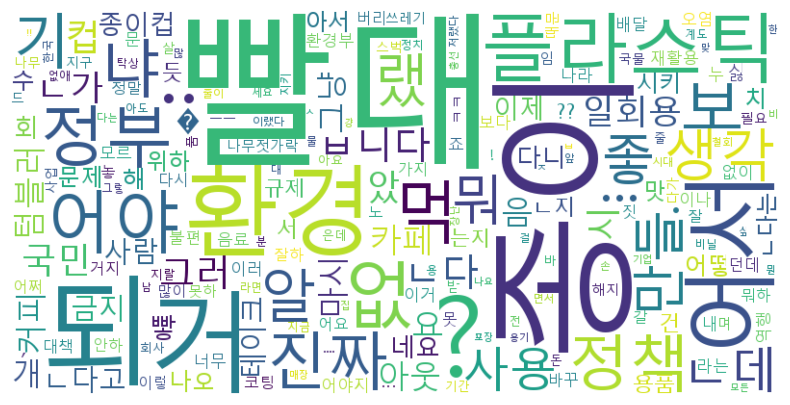

In [7]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
from wordcloud import WordCloud
from collections import Counter

font_path = "MALGUN.TTF"  # 원하는 한글 폰트 파일의 경로

# 각 단어의 빈도를 계산
word_freq = Counter(filtered_words)

# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq)
# 워드 클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Spark 세션 종료
spark.stop()

In [8]:
# 불용어 제거하기
from nltk.corpus import stopwords
result2_pos = kkma.pos(comments2_text)
filtered2_words = [word for word, pos in result2_pos if word not in stopwords.words('korean')]

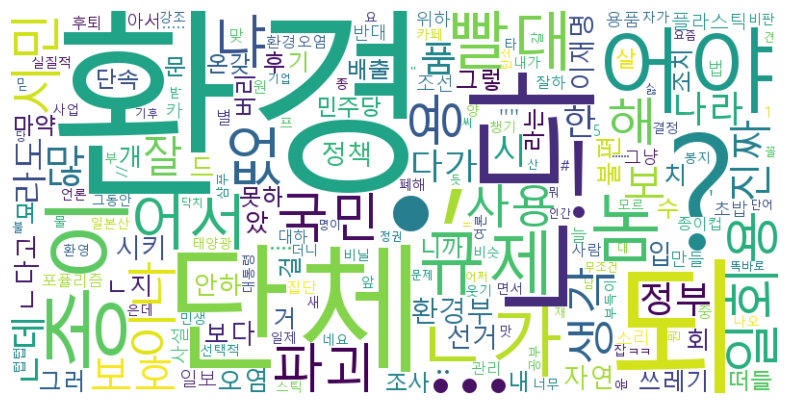

In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
from wordcloud import WordCloud
from collections import Counter

font_path = "MALGUN.TTF"  # 원하는 한글 폰트 파일의 경로

# 각 단어의 빈도를 계산
word_freq2 = Counter(filtered2_words)

# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq2)
# 워드 클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Spark 세션 종료
spark.stop()

In [10]:
with open("output_comments.txt", "w", encoding="utf-8") as file:
    file.write(comments3_text)

In [13]:
from konlpy.tag import Kkma
from nltk.corpus import stopwords

# 불용어 목록 로드
stop_words = set(stopwords.words('korean'))

# 텍스트 파일에서 데이터 로드
with open("output_comments.txt", "r", encoding="utf-8") as file:
    comments3_text = file.read()

result3_pos = kkma.pos(comments3_text)

# 불용어 제거
filtered3_words = [word for word, pos in result3_pos if word not in stop_words]

# 결과 출력 또는 다른 작업 수행
print(filtered3_words)


java.lang.OutOfMemoryError: java.lang.OutOfMemoryError: Java heap space

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
from wordcloud import WordCloud
from collections import Counter

font_path = "MALGUN.TTF"  # 원하는 한글 폰트 파일의 경로

# 각 단어의 빈도를 계산
word_freq3 = Counter(filtered3_words)

# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq3)
# 워드 클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# 불용어 제거하기
from nltk.corpus import stopwords
result3_pos = kkma.pos(comments3_text)
filtered3_words = [word for word, pos in result_pos if word not in stopwords.words('korean')]